<a href="https://colab.research.google.com/github/jinseriouspark/study/blob/main/Faiss_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Facebook AI Similarity Search FAISS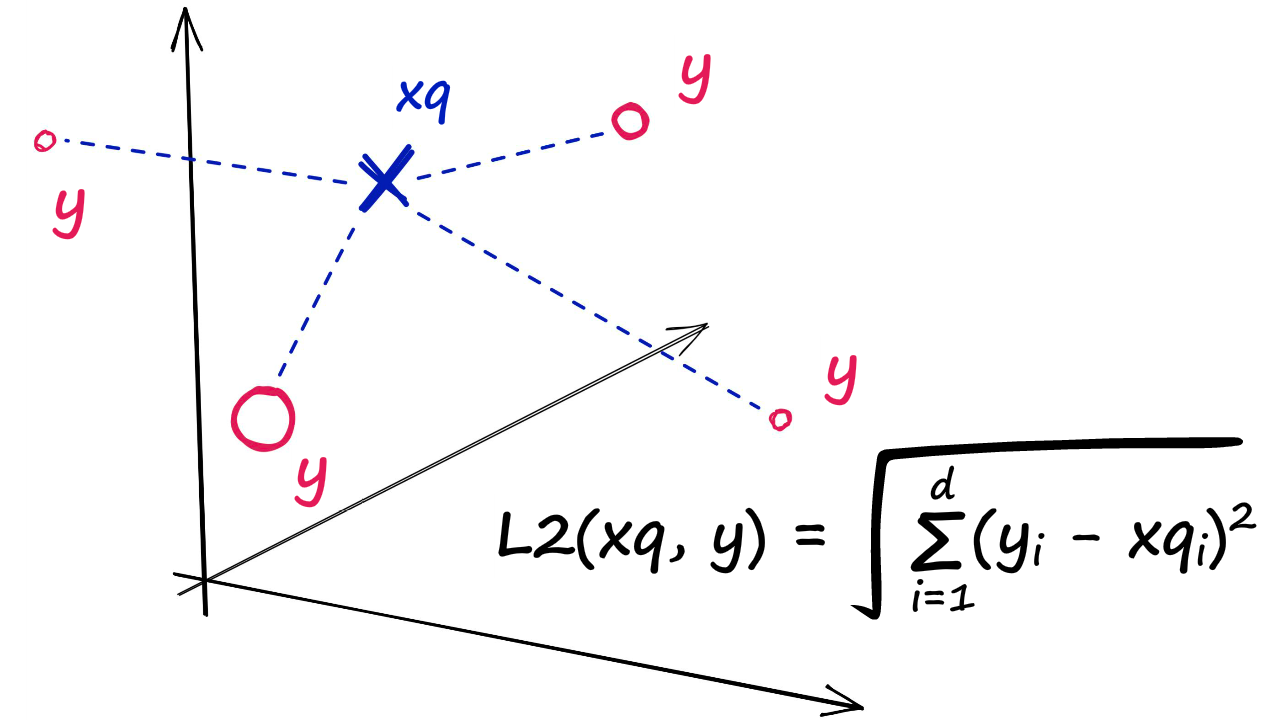
- 참고자료 : https://www.pinecone.io/learn/series/faiss/faiss-tutorial/

In [1]:
import requests
from io import StringIO
import pandas as pd

In [2]:
res = requests.get('https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/sick2014/SICK_train.txt')
# create dataframe
data = pd.read_csv(StringIO(res.text), sep='\t')
data.head()

,pair_ID,sentence_A,sentence_B,relatedness_score,entailment_judgment
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,4.5,NEUTRAL
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,3.2,NEUTRAL
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,4.7,ENTAILMENT
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,3.4,NEUTRAL
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,3.7,NEUTRAL


In [5]:
# all samples both sentence a & b
sentence = data['sentence_A'].tolist()
sentence[:5]

['A group of kids is playing in a yard and an old man is standing in the background',
 'A group of children is playing in the house and there is no man standing in the background',
 'The young boys are playing outdoors and the man is smiling nearby',
 'The kids are playing outdoors near a man with a smile',
 'The young boys are playing outdoors and the man is smiling nearby']

In [6]:
# merge sentences
sentences = data['sentence_A'].tolist()
sentences_b = data['sentence_B'].tolist()
sentences.extend(sentences_b)
len(set(sentences))

4802

In [7]:
# 4802건은 너무 적기 때문에 더 많은 데이터를 가져온다
urls = [
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/MSRpar.train.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/MSRpar.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2012/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2013/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2014/OnWN.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2014/images.test.tsv',
    'https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/semeval-sts/2015/images.test.tsv'
]

In [11]:
for url in urls:
  res = requests.get(url)
  data = pd.read_csv(StringIO(res.text), sep='\t', header = None,on_bad_lines = 'skip')
  sentences.extend(data[1].tolist())
  sentences.extend(data[2].tolist())

len(set(sentences))

14505

In [12]:
sentences = [word for word in list(set(sentences)) if type(word) is str]

In [13]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')
sentence_embeddings = model.encode(sentences)
sentence_embeddings.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
!conda install -c python faiss-gpu

# IndexFlatL2

In [ ]:
import faiss
d = sentence_embeddings.shape[1] # d 는 데이터셋의 차원 수를 담아준다

# IndexFlatL2
index = faiss.IndexFlatL2(d) # index 초기화, d 차원으로 만들어줌
index.is_trained # 학습이 필요하면 True 라는 값을 어등ㄹ 수 있음

In [ ]:
index.add(sentence_embeddings) # 준비한 array 형태의 값을 넣어줌
index.ntotal # row 갯수 확인이 가능

In [ ]:
k = 4
xq = model.encode(['Someone sprints with a football']) # 유사도를 구하고자 하는 쿼리를 넣어줌
print(xq.shape)
print(xq)

In [ ]:
%%time
D, I = index.search(xq, k)
print(I) # I에는 가장 유사한 인덱스 k 가 저장되어있음

In [ ]:
data['Sentence_A'].iloc[I]

In [ ]:
vecs = np.zeros((k, d))
for i, val in enumerate(I[0].tolist()):
  vecs[i, :] = index.reconstruct(val) # I 를 넣고, index 안에 있는 실제 벡터 값을 vecs 에 저장해준다.

In [ ]:
vecs.shape # 위에서 유사하다고 뽑아낸 k개의 값을 넣었다.

In [ ]:
vecs[0][:100] # 첫번째로 유사한 값의 벡터를 100차원까지만 확인한다

# Speed
- 벡터 수가 증가하면 (1_000_000) 선형적으로 증가

# Partitioning the Index
- 어떻게 찾을까? Voronoi Cells 로 나눠서 파티셔닝 후 찾는다
- 이 방법을 사용하면, xq 라는 쿼리를 얻었을때, 여러 메트릭을 사용해서 특정 'cell' 을 먼저 찾는다.